# Exploratory Data Analysis (EDA) Framework
### By Connor Phillips
### www.connorphillips.com
---

## Load
---

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

### Import Data

In [2]:
# Data pulled from https://www.kaggle.com/ruchi798/movies-on-netflix-prime-video-hulu-and-disney?select=MoviesOnStreamingPlatforms_updated.csv
df = pd.read_csv('data.csv', index_col="ID")

## Describe
---

### Data info, preview and shape

In [3]:
df.info() # Data types
df.head() # Data preview - First five rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16744 entries, 1 to 16744
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            16744 non-null  object 
 1   Year             16744 non-null  int64  
 2   Age              7354 non-null   object 
 3   IMDb             16173 non-null  float64
 4   Rotten Tomatoes  5158 non-null   object 
 5   Netflix          16744 non-null  int64  
 6   Hulu             16744 non-null  int64  
 7   Prime Video      16744 non-null  int64  
 8   Disney+          16744 non-null  int64  
 9   Type             16744 non-null  int64  
 10  Directors        16018 non-null  object 
 11  Genres           16469 non-null  object 
 12  Country          16309 non-null  object 
 13  Language         16145 non-null  object 
 14  Runtime          16152 non-null  float64
dtypes: float64(2), int64(6), object(7)
memory usage: 2.0+ MB


,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
ID,,,,,,,,,,,,,,,
1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [4]:
print("Columns: ", df.columns) # Data columns

Columns:  Index(['Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix', 'Hulu',
       'Prime Video', 'Disney+', 'Type', 'Directors', 'Genres', 'Country',
       'Language', 'Runtime'],
      dtype='object')


In [5]:
print("Shape: ",df.shape) # Shape of the data frame
print("Rows: ", df.shape[0])
print("Columns: ", df.shape[0])

Shape:  (16744, 15)
Rows:  16744
Columns:  16744


### Data describe, null values, unique values

In [6]:
df.describe() # Describe the data

,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,16744.000000,16173.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.0,16152.000000
mean,2003.014035,5.902751,0.212613,0.053930,0.737817,0.033684,0.0,93.413447
std,20.674321,1.347867,0.409169,0.225886,0.439835,0.180419,0.0,28.219222
min,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.0,82.000000
50%,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000
75%,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,0.0,104.000000
max,2020.000000,9.300000,1.000000,1.000000,1.000000,1.000000,0.0,1256.000000


In [7]:
df.nunique(axis=0) # Count of unique values in each column

Title              16744
Year                 109
Age                    5
IMDb                  82
Rotten Tomatoes       99
Netflix                2
Hulu                   2
Prime Video            2
Disney+                2
Type                   1
Directors          11338
Genres              1909
Country             1303
Language            1102
Runtime              225
dtype: int64

In [8]:
df.isnull().sum(axis = 0) # Count of null values in each column

Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

### Categorical data describe

In [9]:
# Function that finds the categorical columns in the dataframe and returns the column name, count of unique values and values present
def describe_categorical_values(data, cols):
    num_cols = data._get_numeric_data().columns
    cat_cols = list(set(cols) - set(num_cols))
    df_cat_cols = data[cat_cols]
    for x in cat_cols:
        print("~ ",x, " ~ : Count(",data[x].nunique(),") : ",data[x].unique())

In [10]:
describe_categorical_values(df, df.columns)

~  Directors  ~ : Count( 11338 ) :  ['Christopher Nolan' 'Lana Wachowski,Lilly Wachowski'
 'Anthony Russo,Joe Russo' ... 'Dereck Joubert' 'Bruce Bilson'
 'Richard Slater-Jones']
~  Country  ~ : Count( 1303 ) :  ['United States,United Kingdom' 'United States' 'Italy,Spain,West Germany'
 ... 'Canada,Malaysia,United States' 'United States,Panama,Mexico'
 'United States,Hungary,United Kingdom']
~  Age  ~ : Count( 5 ) :  ['13+' '18+' '7+' nan 'all' '16+']
~  Genres  ~ : Count( 1909 ) :  ['Action,Adventure,Sci-Fi,Thriller' 'Action,Sci-Fi'
 'Action,Adventure,Sci-Fi' ... 'Comedy,Family,Fantasy,Mystery'
 'Family,Drama,Western' 'Comedy,Family,Adventure,Fantasy,Sci-Fi']
~  Rotten Tomatoes  ~ : Count( 99 ) :  ['87%' '84%' '96%' '97%' '95%' '89%' '100%' '93%' '88%' '91%' '86%' '92%'
 '90%' '94%' '80%' '81%' '77%' '85%' '79%' '67%' '83%' '75%' '98%' '65%'
 '71%' '82%' '99%' '68%' '73%' '66%' '78%' '63%' '76%' '74%' '55%' '70%'
 '61%' '69%' '40%' '43%' '72%' '60%' '39%' '62%' '31%' '64%' '59%' '35%'


## Explore
--- 

### Quantitative Data

#### DataFrame

In [11]:
# Set numerical columns to List
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

In [12]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
ID,,,,,,,,
1,2010,8.8,1,0,0,0,0,148.0
2,1999,8.7,1,0,0,0,0,136.0
3,2018,8.5,1,0,0,0,0,149.0
4,1985,8.5,1,0,0,0,0,116.0
5,1966,8.8,1,0,1,0,0,161.0


#### Histograms

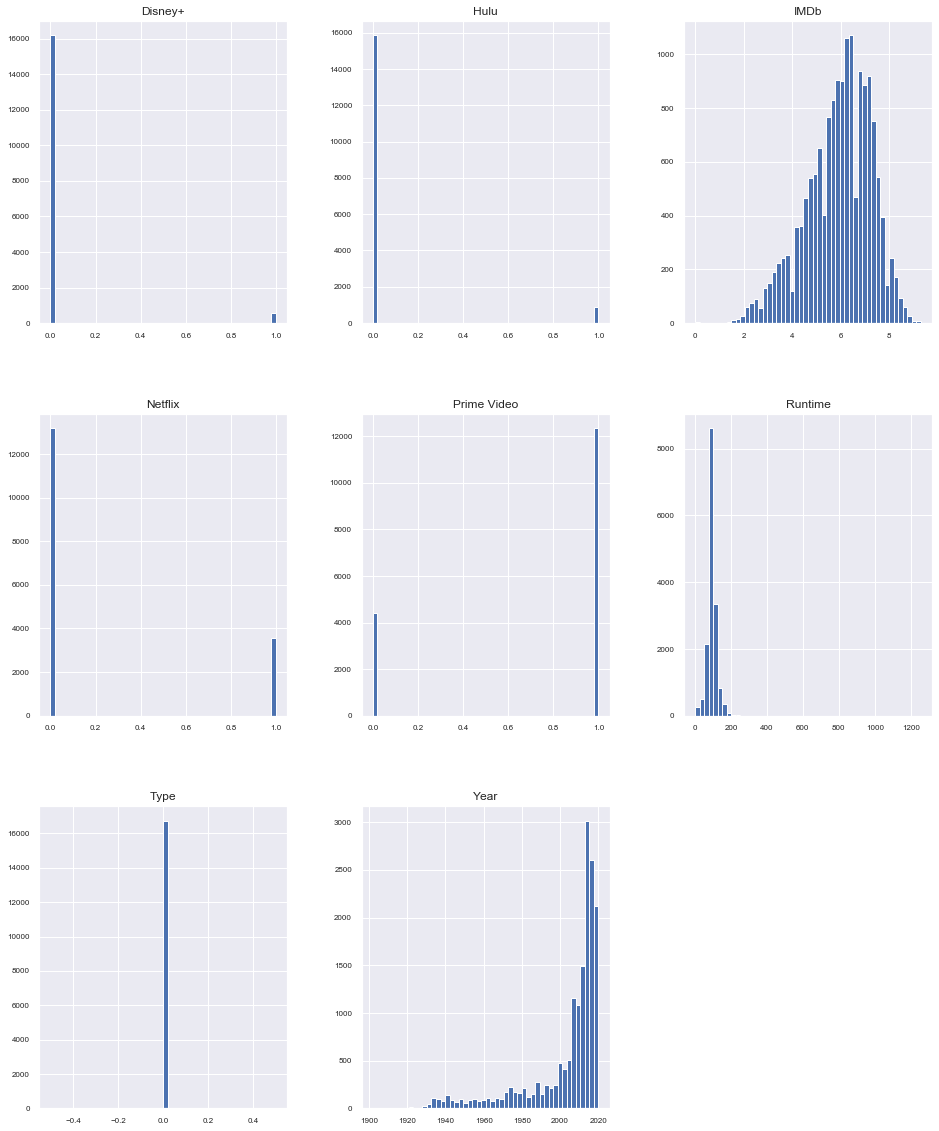

In [13]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

#### Scatterplot

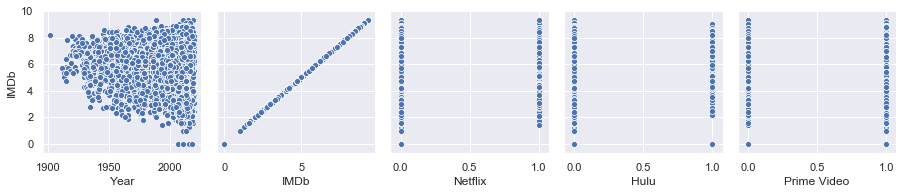

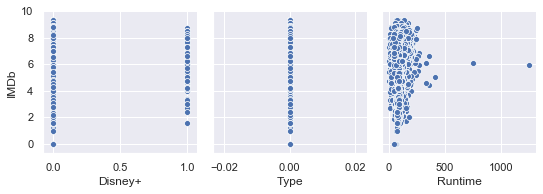

In [14]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num, x_vars=df_num.columns[i:i+5], y_vars=['IMDb'])

### Qualitative Data

#### DataFrame (Based on Columns with Unique Count <= 100)

In [15]:
# Function that finds the categorical columns in the dataframe and passes them to a new dataframe
def categorical_columns(data, cols):
    num_cols = data._get_numeric_data().columns
    cat_cols = list(set(cols) - set(num_cols))
    df_cat_cols = data[cat_cols]
    return df_cat_cols

In [16]:
df_cat = categorical_columns(df, df.columns)

In [17]:
df_cat.head(3)

,Directors,Country,Age,Genres,Rotten Tomatoes,Title,Language
ID,,,,,,,
1,Christopher Nolan,"United States,United Kingdom",13+,"Action,Adventure,Sci-Fi,Thriller",87%,Inception,"English,Japanese,French"
2,"Lana Wachowski,Lilly Wachowski",United States,18+,"Action,Sci-Fi",87%,The Matrix,English
3,"Anthony Russo,Joe Russo",United States,13+,"Action,Adventure,Sci-Fi",84%,Avengers: Infinity War,English


In [45]:
# Categorical DataFrames with less than 100 unique records for visualization
df_cat_viz = pd.DataFrame()

for i in df_cat:
    if df_cat[i].nunique() <= 100:
        df_cat_viz[df_cat[i].name] = df_cat[i]
#         df_cat_viz = df_cat_viz.append(df_cat[i])
        
print(df_cat_viz)

       Age Rotten Tomatoes
ID                        
1      13+             87%
2      18+             87%
3      13+             84%
4       7+             96%
5      18+             97%
...    ...             ...
16740  NaN             NaN
16741   7+             NaN
16742  NaN             NaN
16743  NaN             NaN
16744  NaN             NaN

[16744 rows x 2 columns]


#### Bar charts

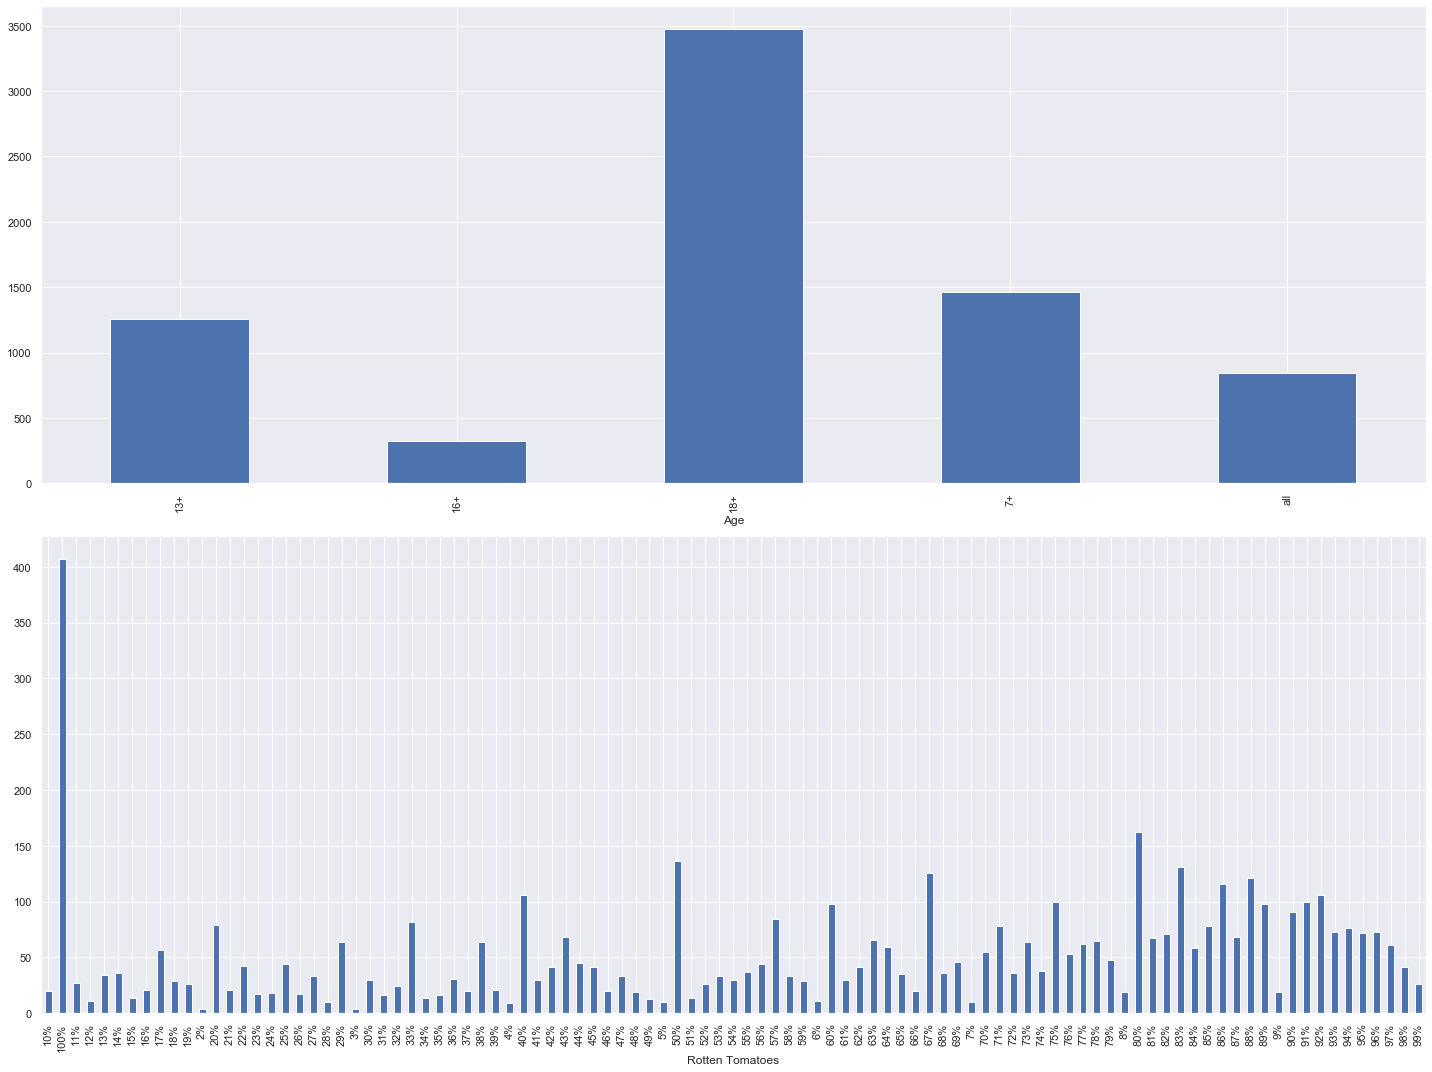

In [68]:
plt_nrows = round(len(df_cat_viz.columns) / 2) + 1
plt_ncols = len(df_cat_viz.columns) - plt_nrows + 1

fig, axs = plt.subplots(plt_nrows, plt_ncols, figsize=(20,15))

for axs, col in zip(axs.ravel(), df_cat_viz.columns):
    df_cat_viz.groupby(col).apply(len).plot(kind='bar', ax=axs)
    
plt.tight_layout()

## Clean
--- 

### Remove Outliers

The removal process for this framework is based on the IQR and removes rows based on the user selected column

In [71]:
# outlier removal function using interquartile range
def reject_outliers_iqr(data, metric):
    metric_formatted = data[metric].astype(float)
    print(metric_formatted)
    q1, q3 = np.percentile(metric_formatted, [25, 75])
    iqr = q3 - q1
    
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    data = data[(metric_formatted > lower_bound) & (metric_formatted < upper_bound)]
    
    return data

In [72]:
reject_outliers_iqr(df, 'IMDb')

ID
1        8.8
2        8.7
3        8.5
4        8.5
5        8.8
        ... 
16740    6.2
16741    4.7
16742    5.7
16743    6.6
16744    NaN
Name: IMDb, Length: 16744, dtype: float64


,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
ID,,,,,,,,,,,,,,,


### Fill or Drop Null Values

In [74]:
# Using fill for this example
df.fillna(0)

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
ID,,,,,,,,,,,,,,,
1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16740,The Ghosts of Buxley Hall,1980,0,6.2,0,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16741,The Poof Point,2001,7+,4.7,0,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16742,Sharks of Lost Island,2013,0,5.7,0,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,0.0


### Variable Selection

This section represents the transition from exploration to selection of the data points that you would like to examine further to answer specific questions that have come to mind or have been presented by other parties.

I hope you have found this framework helpful and good luck with your data analysis!